<a href="https://colab.research.google.com/github/spring-bahar/Python-Projects/blob/main/Sleep_Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd 

In [2]:
df = pd.read_csv("Sleep_Efficiency.csv")

In [3]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [5]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [8]:
df.rename(columns = {'Sleep efficiency':'Sleep_efficiency','Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [9]:
import matplotlib.pyplot as plt

In [10]:
df['hourb'] = pd.to_datetime(df['Bedtime'], errors='coerce').dt.hour

In [81]:
df['hourw'] = pd.to_datetime(df['Wakeup_time'], errors='coerce').dt.hour


In [12]:
pd.qcut(df['Age'], q=5)

0       (53.0, 69.0]
1       (53.0, 69.0]
2       (37.0, 46.0]
3       (37.0, 46.0]
4       (53.0, 69.0]
           ...      
445     (27.0, 37.0]
447    (8.999, 27.0]
448     (46.0, 53.0]
450     (37.0, 46.0]
451    (8.999, 27.0]
Name: Age, Length: 388, dtype: category
Categories (5, interval[float64, right]): [(8.999, 27.0] < (27.0, 37.0] < (37.0, 46.0] <
                                           (46.0, 53.0] < (53.0, 69.0]]

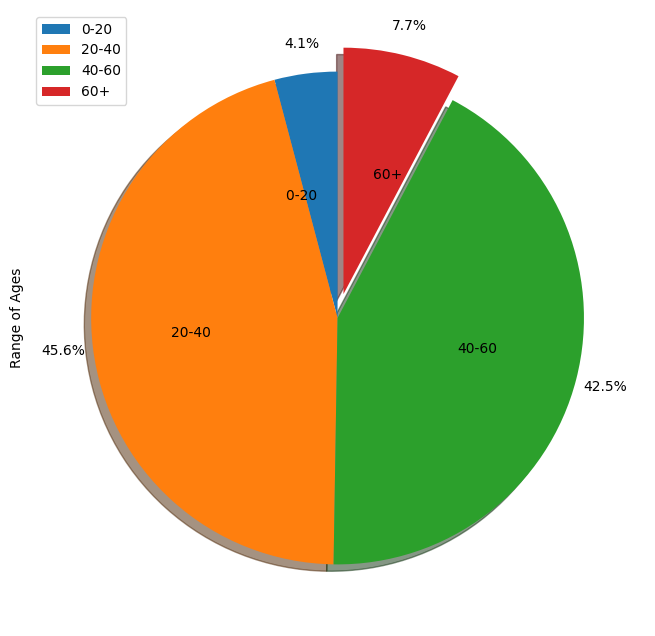

In [89]:
explode_list = [0.0, 0, 0,0.1] # ratio for each continent with which to offset each wedge.
labels = '0-20 ', '20-40 ', '40-60', '60+ '
a.plot(kind='pie',
             figsize=(15, 8),
             autopct='%1.1f%%', 
             startangle=90,    
             shadow=True,       
             labels=labels,   
             labeldistance=.5,              
             pctdistance=1.12,            # the ratio between the pie center and start of text label
             explode=explode_list         
            )

 



plt.ylabel('Range of Ages')
# add legend
plt.legend(labels=a.index, loc='upper left') 

# show plot
plt.show()    
                             

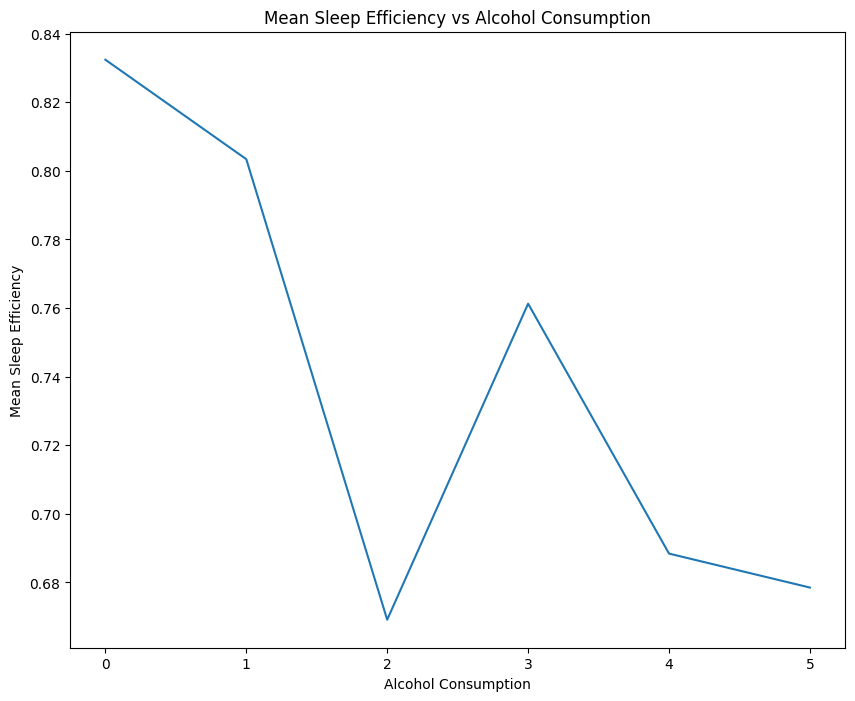

In [55]:
grouped_data = df.groupby('Alcohol_consumption')['Sleep_efficiency'].mean()
# create a line chart of mean sleep efficiency vs alcohol consumption
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Mean Sleep Efficiency')
plt.title('Mean Sleep Efficiency vs Alcohol Consumption')
plt.show()


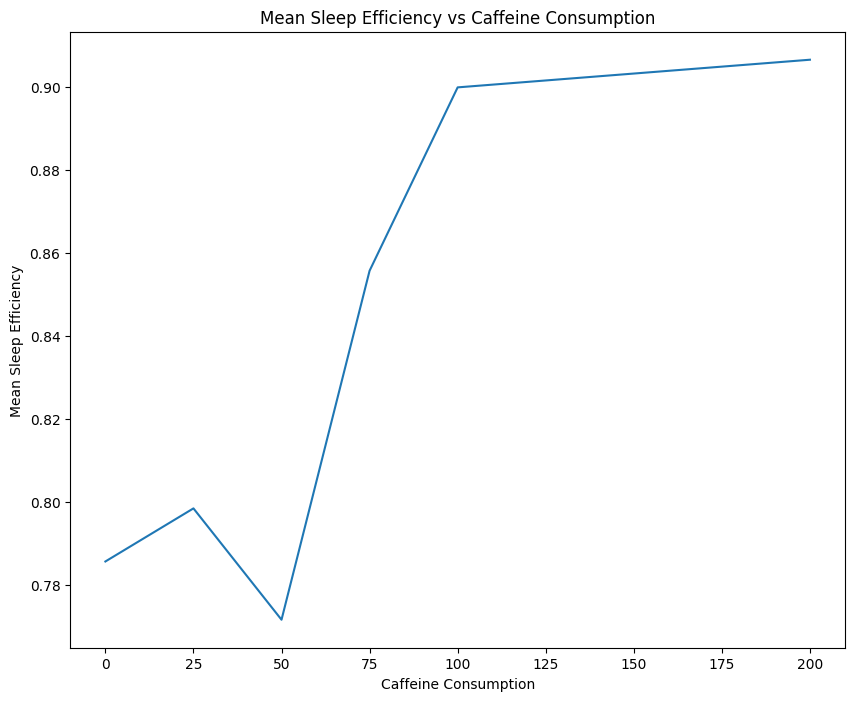

In [90]:
grouped_data = df.groupby('Caffeine_consumption')['Sleep_efficiency'].mean()
# create a line chart of mean sleep efficiency vs Caffeine consumption
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Caffeine Consumption')
plt.ylabel('Mean Sleep Efficiency')
plt.title('Mean Sleep Efficiency vs Caffeine Consumption')
plt.show()

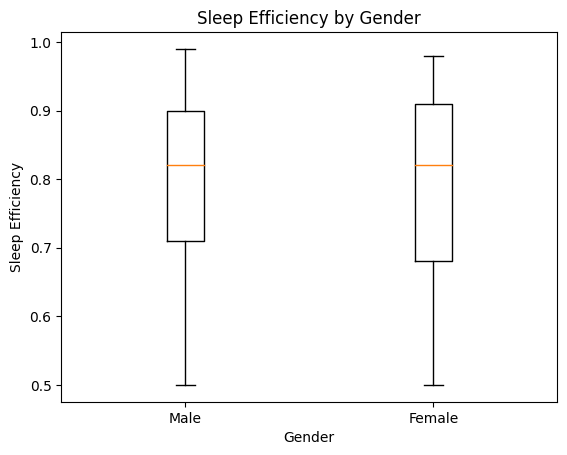

In [44]:
# create separate arrays of sleep efficiency data for each gender
male_efficiency = df[df['Gender'] == 'Male']['Sleep_efficiency']
female_efficiency = df[df['Gender'] == 'Female']['Sleep_efficiency']

# create a box plot of sleep efficiency by gender
plt.boxplot([male_efficiency, female_efficiency])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Sleep Efficiency')
plt.title('Sleep Efficiency by Gender')
plt.show()

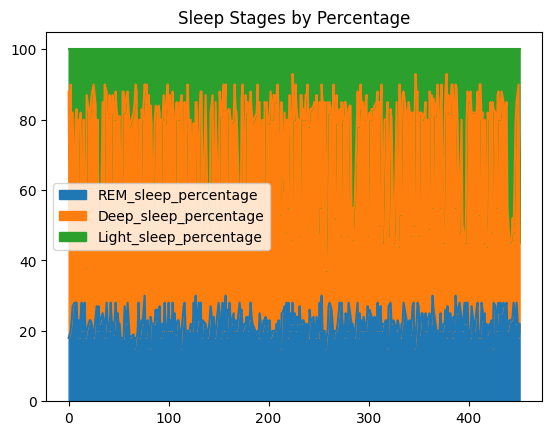

In [45]:
sleep_stages = df[["REM_sleep_percentage", "Deep_sleep_percentage", "Light_sleep_percentage"]]
sleep_stages.plot.area(stacked=True)
plt.title("Sleep Stages by Percentage")
plt.show()

Text(0.5, 0, 'Sleep_duration')

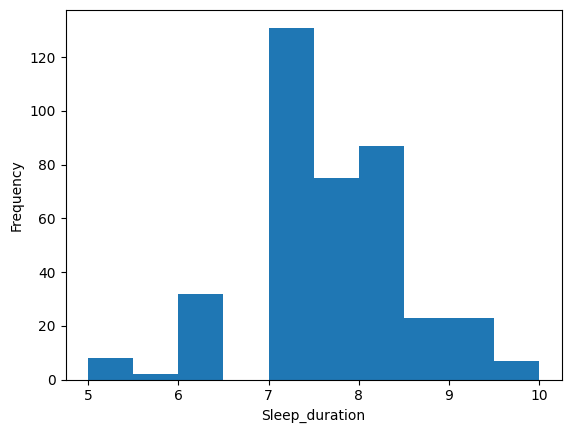

In [21]:
df['Sleep_duration'].plot(kind='hist')
plt.xlabel('Sleep_duration')



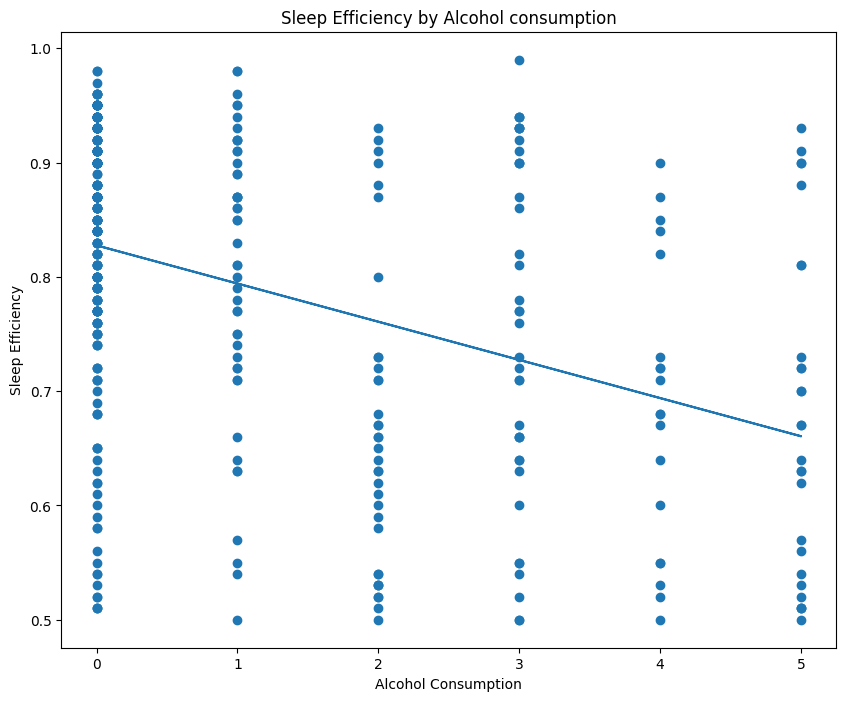

In [53]:
plt.scatter(x=df['Alcohol_consumption'], y=df['Sleep_efficiency'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Sleep Efficiency by Alcohol consumption')
#calculate equation for trendline
x=df['Alcohol_consumption']
y=df['Sleep_efficiency']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))
plt.xlabel('Alcohol Consumption')
plt.ylabel('Sleep Efficiency')
plt.show()

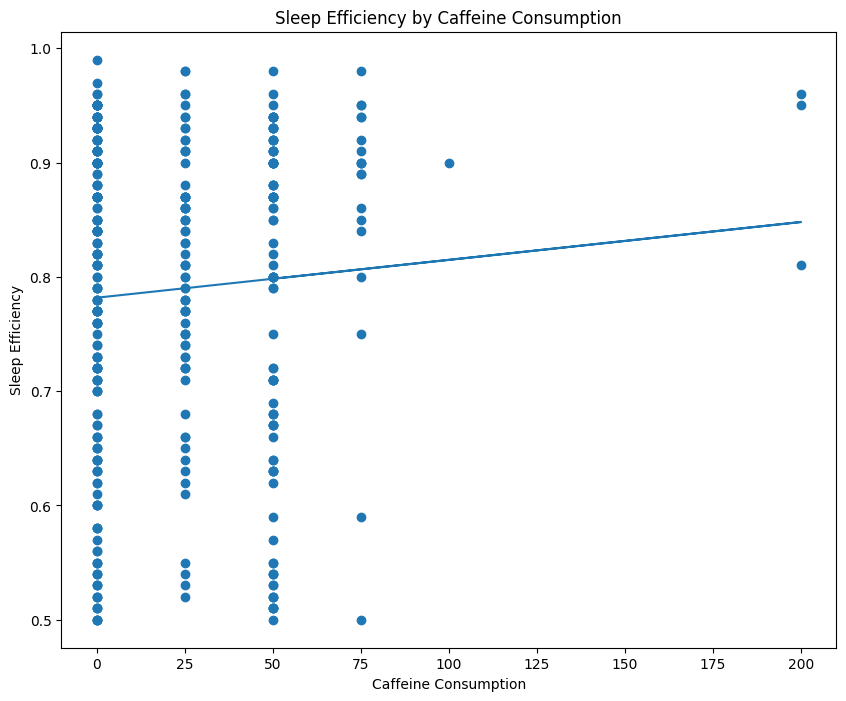

In [80]:
plt.scatter(x=df['Caffeine_consumption'], y=df['Sleep_efficiency'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Sleep Efficiency by Caffeine Consumption')
#calculate equation for trendline
x=df['Caffeine_consumption']
y=df['Sleep_efficiency']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))
plt.xlabel('Caffeine Consumption')
plt.ylabel('Sleep Efficiency')
plt.show()

Text(0, 0.5, 'Sleep Efficiency')

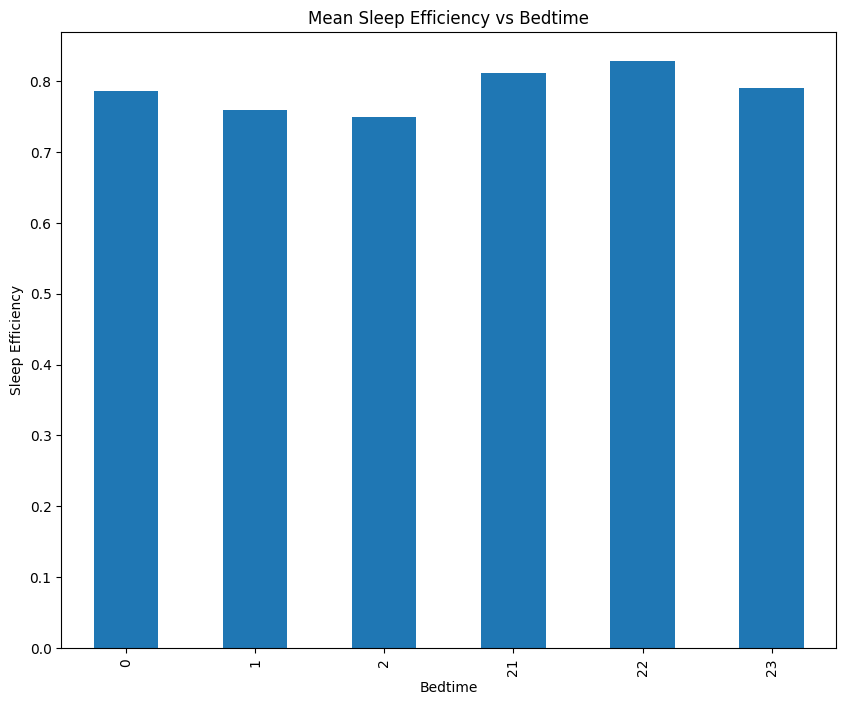

In [96]:
grouped_heff = df.groupby('hourb')['Sleep_efficiency'].mean()
grouped_heff.plot(kind='bar')
plt.title("Mean Sleep Efficiency vs Bedtime")
plt.xlabel('Bedtime')
plt.ylabel('Sleep Efficiency')
